In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
data_airbnb=pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [3]:
print("Row : "+str(data_airbnb.shape[0]))
print("Column : "+str(data_airbnb.shape[1]))

Row : 48895
Column : 16


In [4]:
#show feature name & dtype
data_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
data_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Explore data column by column

## Object Dtype

In [8]:
data_airbnb['name'].value_counts()

Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
Brooklyn Apartment                                   12
Private Room                                         11
                                                     ..
Entire 3rd floor of Brownstone at Prospect Park!      1
studio type large next to LGA/JFK/Manhattan20 min     1
Bright and Spacious Summer Stay                       1
NY MANHATTAN DOUBLE ROOM                              1
Spacious Brooklyn Loft Apartment & Rooftop Deck       1
Name: name, Length: 47905, dtype: int64

In [9]:
data_airbnb['host_name'].value_counts()

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
               ... 
Cleber            1
Kaylie            1
Janio             1
Colette&Sean      1
Abosede           1
Name: host_name, Length: 11452, dtype: int64

In [10]:
data_airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [11]:
data_airbnb['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
New Dorp                 1
Willowbrook              1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [12]:
data_airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [13]:
data_airbnb['last_review'].value_counts()

2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2016-03-06       1
2014-03-24       1
2013-09-16       1
2014-08-17       1
2017-03-03       1
Name: last_review, Length: 1764, dtype: int64

In [14]:
data_airbnb['last_review'][0:5]

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

## Int & Float Dtype

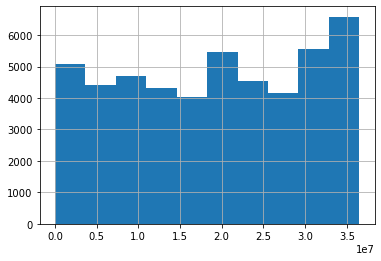

In [15]:
data_airbnb["id"].hist()

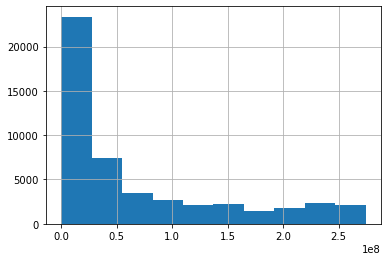

In [16]:
data_airbnb["host_id"].hist()

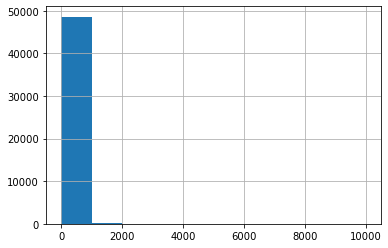

In [17]:
data_airbnb["price"].hist()

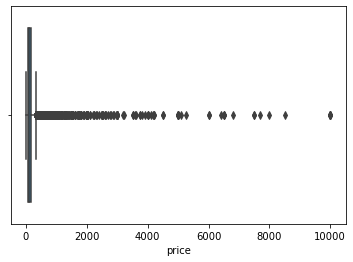

In [18]:
ax = sns.boxplot(x=data_airbnb["price"])

In [19]:
data_airbnb["minimum_nights"].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

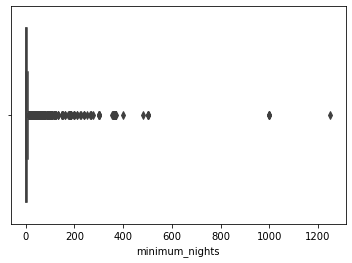

In [20]:
ax = sns.boxplot(x=data_airbnb["minimum_nights"])

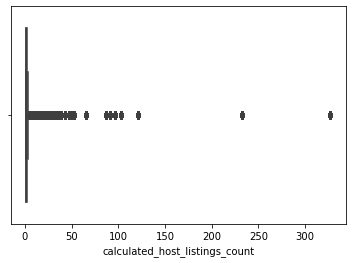

In [21]:
ax = sns.boxplot(x=data_airbnb["calculated_host_listings_count"])

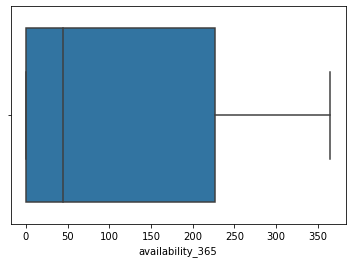

In [22]:
ax = sns.boxplot(x=data_airbnb["availability_365"])

## Cleaning

In [23]:
data_airbnb.duplicated().sum()
data_airbnb.drop_duplicates(inplace=True)

In [24]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [25]:
data_airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [26]:
data_airbnb.shape[1]

12

In [27]:
data_airbnb = data_airbnb.dropna()

In [28]:
data_airbnb.shape

(38843, 12)

## Map Aspect

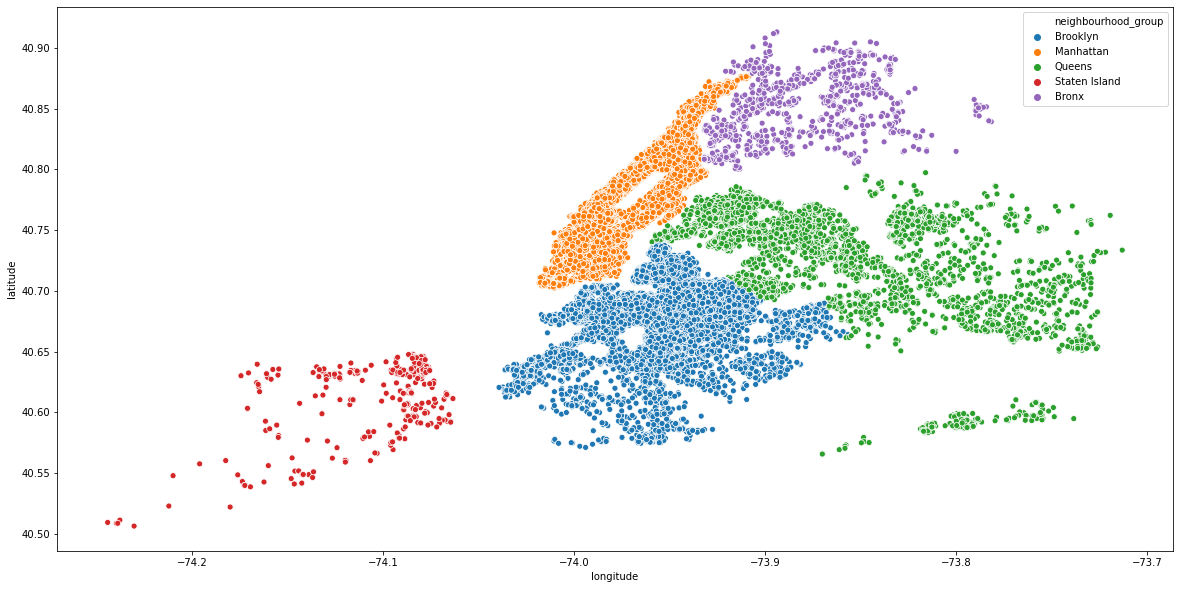

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(data_airbnb["longitude"],data_airbnb["latitude"],hue=data_airbnb["neighbourhood_group"])
plt.ioff()

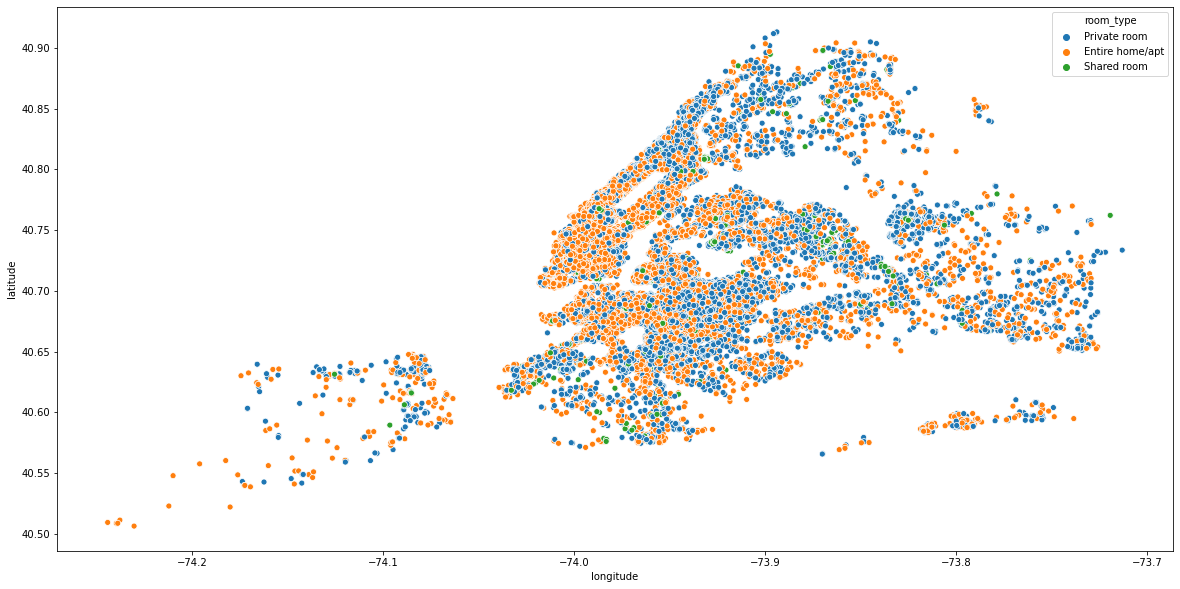

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(data_airbnb["longitude"],data_airbnb["latitude"],hue=data_airbnb["room_type"])
plt.ioff()

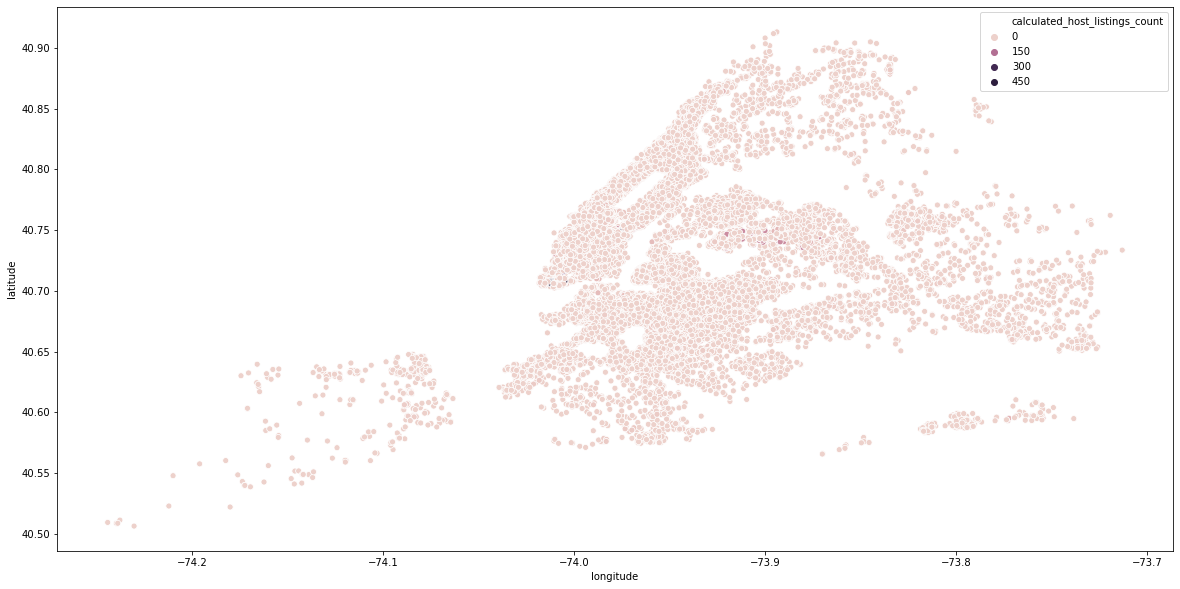

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(data_airbnb["longitude"],data_airbnb["latitude"],hue=data_airbnb["calculated_host_listings_count"])
plt.ioff()

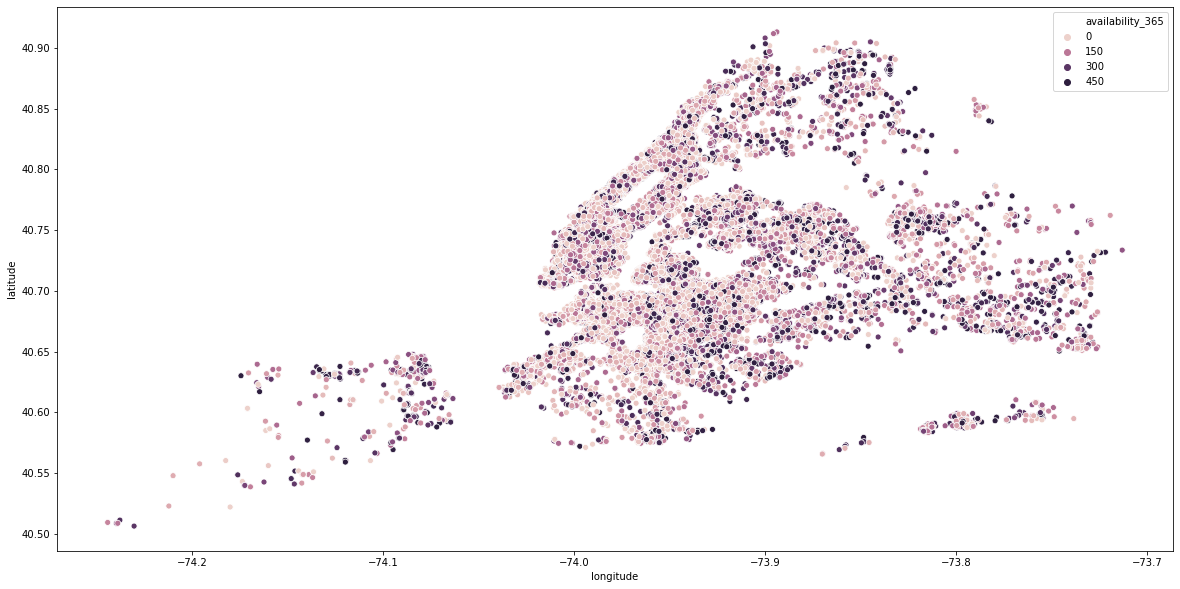

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(data_airbnb["longitude"],data_airbnb["latitude"],hue=data_airbnb["availability_365"])
plt.ioff()

## Plot Correlation

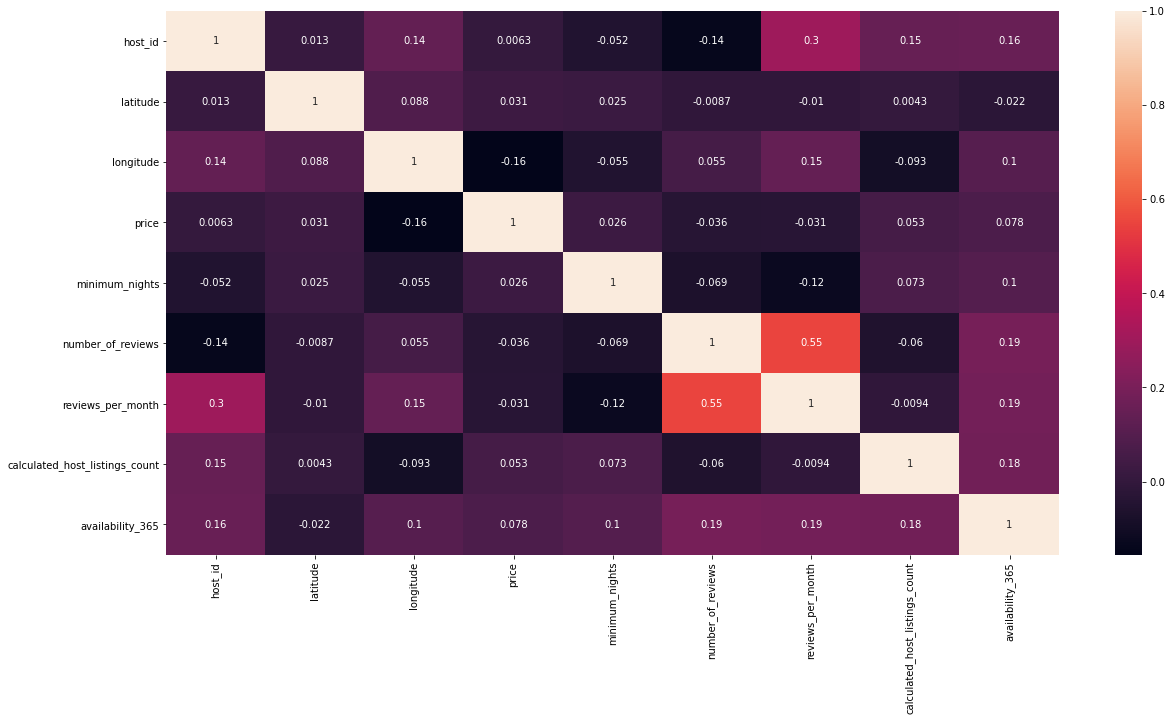

In [33]:
corr = data_airbnb.corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

# Do Dendrogram

In [34]:
data_airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [35]:
data_airbnb.shape

(38843, 12)

## Clustering the neighbourhood_group by price

In [36]:
data_airbnb["neighbourhood_group"].value_counts()

Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [37]:
data_airbnb.groupby("neighbourhood_group").mean()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,
Bronx,1.007616e+08,40.848306,-73.883928,79.553653,3.932648,32.386986,1.837831,2.204338,170.940639
Brooklyn,5.469297e+07,40.684795,-73.951023,121.448714,5.320788,29.584362,1.283212,2.233052,105.879309
Manhattan,6.326809e+07,40.765973,-73.973902,180.052489,7.010342,27.330988,1.272131,8.769360,109.322932
Queens,9.282430e+07,40.731389,-73.871185,95.762571,4.221032,34.313511,1.941200,3.354394,150.508308
Staten Island,9.740580e+07,40.611207,-74.104838,89.964968,3.420382,36.754777,1.872580,2.388535,205.640127


In [38]:
data_fil_neighbourhood_group = data_airbnb.groupby("neighbourhood_group").mean().reset_index().loc[:,['neighbourhood_group','price']]
data_fil_neighbourhood_group.head()

,neighbourhood_group,price
0,Bronx,79.553653
1,Brooklyn,121.448714
2,Manhattan,180.052489
3,Queens,95.762571
4,Staten Island,89.964968


In [39]:
list_data_fil_neighbourhood_group = [ [price] for price in data_fil_neighbourhood_group["price"].to_list()]
list_data_fil_neighbourhood_group

[[79.55365296803653],
 [121.44871405119474],
 [180.05248917748918],
 [95.76257105378225],
 [89.96496815286625]]

In [40]:
Z = linkage(list_data_fil_neighbourhood_group, 'complete')

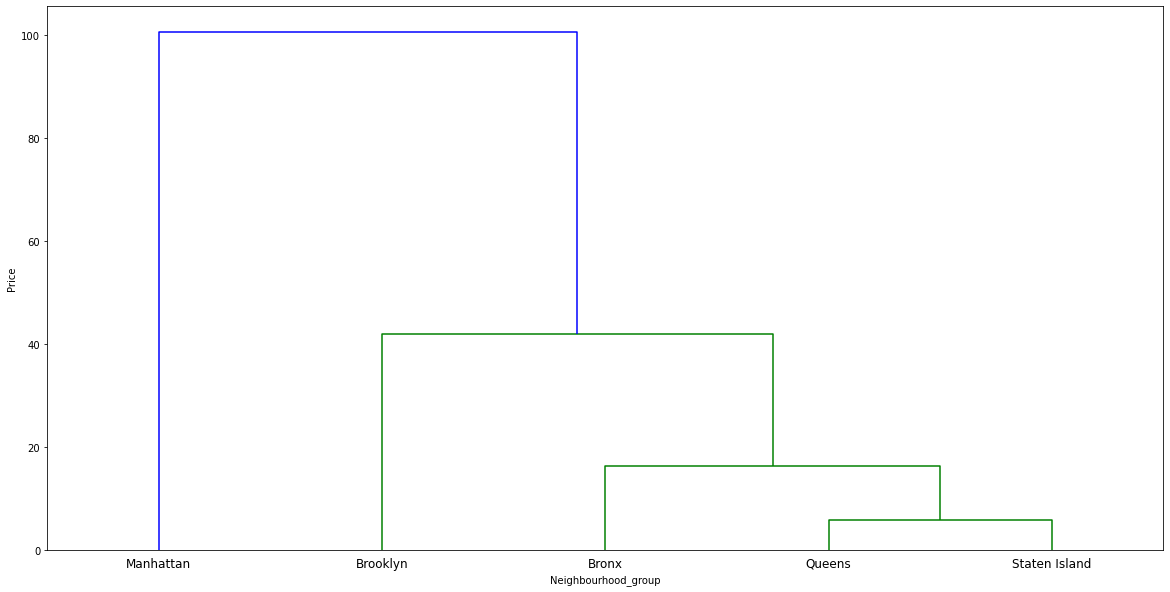

In [41]:
fig = plt.figure(figsize=(20, 10))
dendrogram(Z, labels=data_fil_neighbourhood_group["neighbourhood_group"].to_list())
plt.ylabel('Price')
plt.xlabel('Neighbourhood_group')
plt.show()

## Clustering the neighbourhood by price

In [42]:
data_airbnb["neighbourhood"].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Olinville                2
Prince's Bay             2
Willowbrook              1
Rossville                1
Richmondtown             1
Name: neighbourhood, Length: 218, dtype: int64

In [43]:
data_airbnb["neighbourhood"].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Olinville                2
Prince's Bay             2
Willowbrook              1
Rossville                1
Richmondtown             1
Name: neighbourhood, Length: 218, dtype: int64

In [44]:
data_fil_neighbourhood = data_airbnb.groupby("neighbourhood").mean().reset_index().loc[:,['neighbourhood','price']]
data_fil_neighbourhood.head()

,neighbourhood,price
0,Allerton,90.594595
1,Arden Heights,67.250000
2,Arrochar,118.250000
3,Arverne,158.515152
4,Astoria,116.018336


In [45]:
list_data_fil_neighbourhood = [ [price] for price in data_fil_neighbourhood["price"].to_list()]
list_data_fil_neighbourhood

[[90.5945945945946],
 [67.25],
 [118.25],
 [158.5151515151515],
 [116.01833568406207],
 [84.8],
 [182.19444444444446],
 [105.37391304347825],
 [118.8],
 [102.5],
 [78.0],
 [178.1290322580645],
 [92.27272727272727],
 [105.95893027698185],
 [166.4],
 [80.5],
 [79.45],
 [77.21311475409836],
 [105.75],
 [167.76190476190476],
 [64.4],
 [195.0],
 [101.24444444444444],
 [87.28813559322033],
 [51.875],
 [201.95967741935485],
 [75.58928571428571],
 [48.0],
 [85.11728395061728],
 [83.4375],
 [96.23703703703704],
 [178.8989898989899],
 [74.0],
 [182.0],
 [221.79227053140096],
 [157.46417445482865],
 [94.26666666666667],
 [169.83333333333334],
 [68.9375],
 [101.33333333333333],
 [84.92307692307692],
 [176.15833333333333],
 [77.5],
 [193.4318181818182],
 [93.0],
 [133.57142857142858],
 [60.583333333333336],
 [77.95121951219512],
 [73.16666666666667],
 [125.6],
 [56.932203389830505],
 [111.63083003952569],
 [130.968],
 [178.375],
 [92.70967741935483],
 [79.42857142857143],
 [82.75],
 [152.2807017543

In [46]:
Z = linkage(list_data_fil_neighbourhood, 'complete')

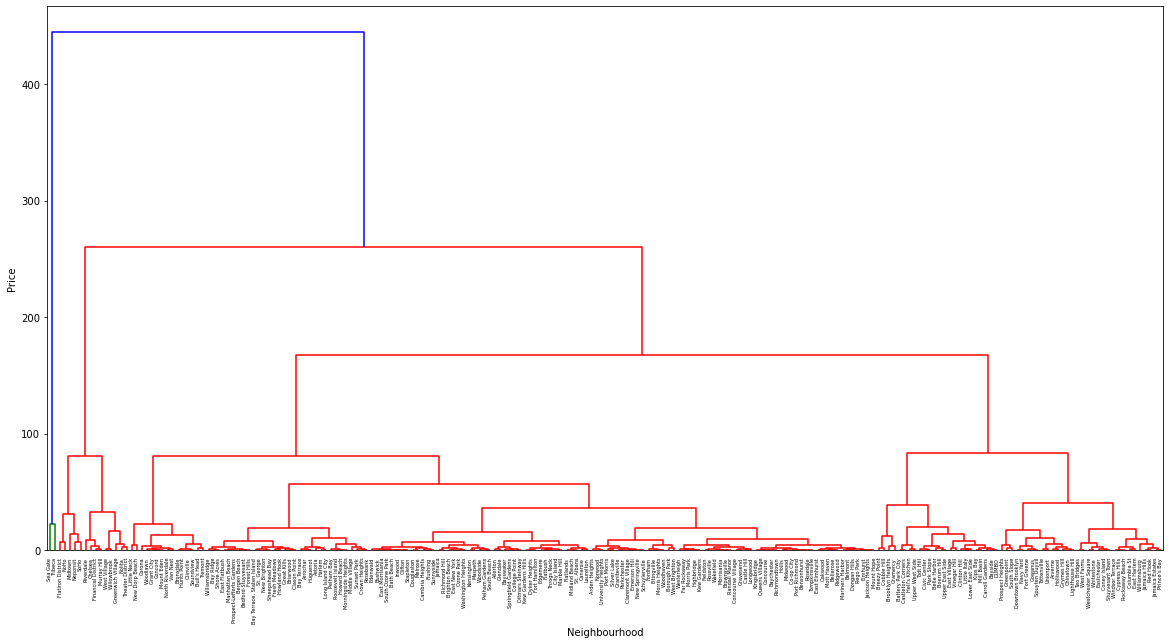

In [47]:
fig = plt.figure(figsize=(20, 10))
dendrogram(Z, labels=data_fil_neighbourhood["neighbourhood"].to_list())
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.show()

## Clustering the room_type by price

In [48]:
data_fil_room_type = data_airbnb.groupby("room_type").mean().reset_index().loc[:,['price','room_type']]

In [49]:
data_fil_room_type.head()

,price,room_type
0,196.294068,Entire home/apt
1,83.981093,Private room
2,63.213948,Shared room


In [50]:
list_data_fil_room_type = [ [price] for price in data_fil_room_type["price"].to_list()]

In [52]:
list_data_fil_room_type

[[196.2940684635058], [83.9810925559015], [63.21394799054374]]

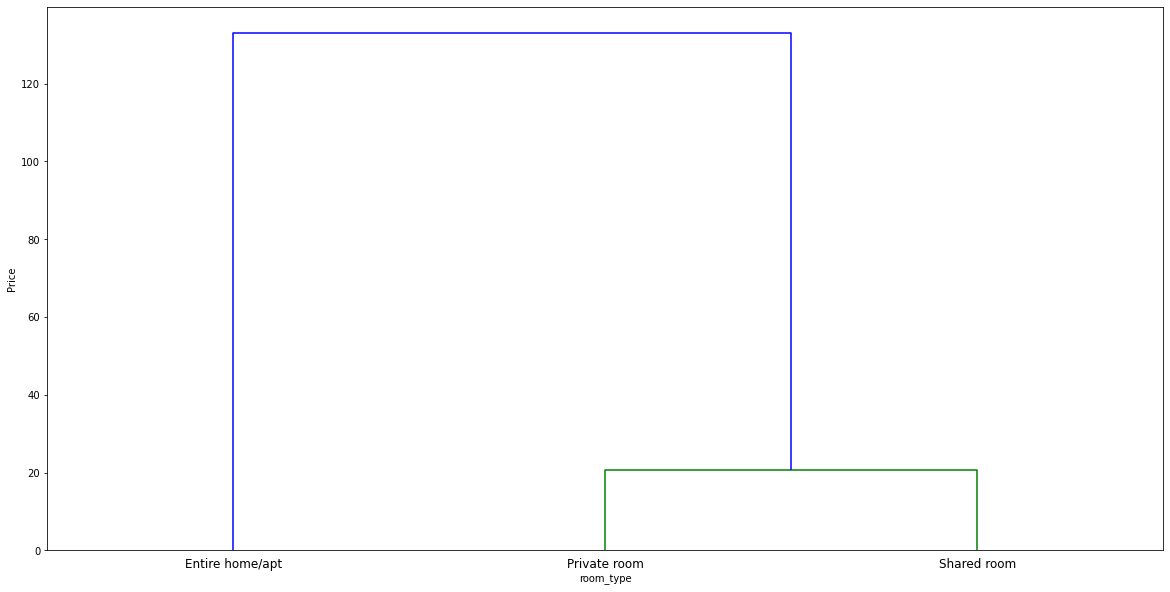

In [53]:
Z = linkage(list_data_fil_room_type, 'complete')

fig = plt.figure(figsize=(20, 10))
dendrogram(Z, labels=data_fil_room_type["room_type"].to_list())
plt.ylabel('Price')
plt.xlabel('room_type')
plt.show()